Mustafa Atik - SWE 577

In [7]:
from sklearn import svm, linear_model, neighbors, ensemble
from sklearn import cross_validation, grid_search
from sklearn import datasets
import numpy as npes
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
import time
from IPython.display import YouTubeVideo
%matplotlib inline

# Support vector machines (SVM)
SVM is a method that is widely used for classification and regression tasks. The most important characteristic of svm is that it tries to find a decision boundary which separates classes with equal distance. SVM decision boundaries are as wide as possible so that's why sometimes this method is called widest street approach, or large margin classifier.

SVM has other nice properties such as it is convex, theoretically motivated, nonlinear with kernels.

Let's have a look at the space shown below.

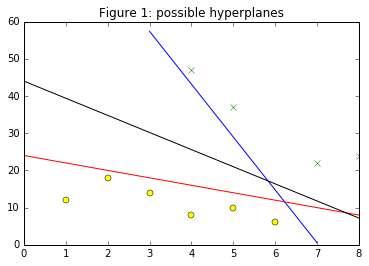

In [2]:
x1 = [1, 2, 3, 4, 5, 6]
y1 = [12, 18, 14, 8, 10, 6]

x2 = [4, 5, 7, 8]
y2 = [47, 37, 22, 24]
plt.plot(x1, y1, "o", color="yellow")
plt.plot(x2, y2, "x", color="green")

plt.plot(range(3, 8),[ i * (-14.2) + 100 for i in range(3, 8)], color="blue")
#plt.plot(range(12),[ i * - 4.4 + 45 for i in range(12)], color="blue")
plt.plot(range(9),[ i * - 2.0 + 24 for i in range(9)], color="red")
plt.plot(range(9),[ i * - 4.6 + 44 for i in range(9)], color="k")

plt.title("Figure 1: possible hyperplanes")

As it can be seen, all the lines separate the classes perfectly. What's more, we can draw more straight lines still separating perfectly. But only one of them will give us the minimum misclassification error. So which line is that?

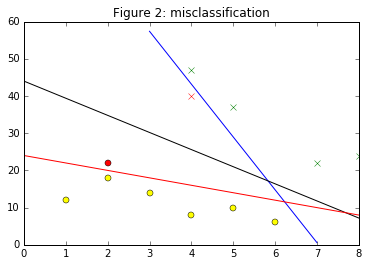

In [3]:
x1 = [1, 2, 3, 4, 5, 6]
y1 = [12, 18, 14, 8, 10, 6]

x2 = [4, 5, 7, 8]
y2 = [47, 37, 22, 24]
plt.plot(x1, y1, "o", color="yellow")
plt.plot(x2, y2, "x", color="green")
plt.plot([4], [40], "x", color="red")
plt.plot([2], [22], "o", color="red")

plt.plot(range(3, 8),[ i * (-14.2) + 100 for i in range(3, 8)], color="blue")
plt.plot(range(9),[ i * - 4.6 + 44 for i in range(9)], color="k")
plt.plot(range(9),[ i * - 2.0 + 24 for i in range(9)], color="red")
plt.title("Figure 2: misclassification")

Since the red and blue lines are too close to the classes, they are prone to misclassification. However, intuitively, the black one that has the largest margin to the nearest training data points does a better job at classification.

So next question is how do we get the black line?

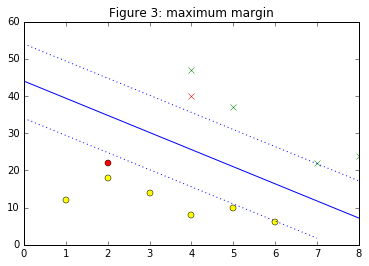

In [4]:
x1 = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y1 = [12.0, 18.0, 14.0, 8.0, 10.0, 6.0]

x2 = [4, 5, 7, 8]
y2 = [47, 37, 22, 24]
plt.plot(x1, y1, "o", color="yellow")
plt.plot(x2, y2, "x", color="green")

plt.plot([4], [40], "x", color="red")
plt.plot([2], [22], "o", color="red")

plt.plot(range(9),[ i * - 4.6 + 54 for i in range(9)], ":", color="blue")
plt.plot(range(9),[ i * - 4.6 + 44 for i in range(9)], color="blue")
plt.plot(range(8),[ i * - 4.6 + 34 for i in range(8)], ":", color="blue")
plt.title("Figure 3: maximum margin")

Let w is a vector perpendicular to the median line. But we do not know its length yet. And u is an unknown example. We project the u vector down on to the w vector so that we have a distance. It goes further out, it ends up on the right side of the street. Or it is a short distance which means it is on the left side. So we can formulate it like this:

$$ \vec{w}  \cdot \vec{u} \geq c $$
or can be rewritten as: $$ c = -b $$ 
$$ \vec{w}  \cdot \vec{u}_{+} + b \geq 1 \ \ \ {{for + samples}}$$
$$ \vec{w}  \cdot \vec{u}_{-} + b \leq -1 \ \ \ {{for - samples}}$$
to make it mathematically convenient, reformulate it as:
$$ y \in \left \{ -1, 1 \right \} \ \ \  and \ \ \  y(\vec{w}  \cdot \vec{u} + b) + 1 = 0 $$
It is equal to 0 when the sample is on the street. 


$$ width\ of\ the\ street = (\vec{x}_{+} - \vec{x}_{-}) \cdot \frac{\vec{w}}{\left \| \vec{w} \right \|}$$
$$ width\ of\ the\ street =  \frac{2}{\left \| \vec{w} \right \|}$$

So we want to maximize the margin, or the minimize the following: 
$$ \frac{1}{2} \left \| \vec{w} \right \|^{2} $$

So far, we've come up with the two constraints. By using **Lagrange multipliers**, we can get a formula which gives maximum/minimum without thinking about the constraints anymore. 

$$ L = \frac{1}{2} \left \| \vec{w} \right \|^{2}  - 
\sum \lambda \left [  y_{i} (\vec{w} \cdot \vec{x_{i}+b} - 1 )  \right ] $$
After takin the derivates of L with respect to w and b:
$$ \frac{\partial L}{\partial \vec{w}} = \vec{w} - \sum \lambda \cdot y_{i} \cdot \vec{x_{i}}  $$
$$ \frac{\partial L}{\partial b} =  - \sum \vec{x_{i}} \cdot y_{i} = 0$$
Now the decision rule will be as:
$$ \sum \lambda _{i}  \cdot y_{i} \cdot \vec{x_{i}} \cdot \vec{u} + b \geq 0 $$

## Kernel trick
SVM can also work with non-linear data with the help of kernel trick. Kernel trick maps data points to a higher dimension in which classification problem becomes linearly separable. 
Most popular kernel tricks are:
linear: $$\langle x, x'\rangle$$.
polynomial: $$(\gamma \langle x, x'\rangle + r)^d.d$$ is specified by keyword degree, r by coef0.
rbf: $$\exp(-\gamma |x-x'|^2). \gamma$$ is specified by keyword gamma, must be greater than 0.
sigmoid: $$(\tanh(\gamma \langle x,x'\rangle + r))$$, where r is specified by coef0.


In [5]:
YouTubeVideo("3liCbRZPrZA")

In [5]:
from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y, title=""):
    
    try:
        X, y = X.values, y.values
    except AttributeError:
        pass
    
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()

In [6]:
def classify(clfs, X, y):
    for title, clf in clfs:
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            X, y, test_size=0.3, random_state=0)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        plot_estimator(clf, X, y, "{} - score: {}".format(title, score))
        plt.show()

In [7]:
def timeit(clfs, X, y):
    results = []
    for title, clf in clfs:
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            X, y, test_size=0.3, random_state=0)
        
        trial = 500
        
        startTime = time.time()
        for i in range(trial):
            clf.fit(X_train, y_train)
        trainingTime = time.time() - startTime
        print "{} times training {} with the data that has shape {} took {}".format(
            trial, title, X_train.shape, trainingTime)
        
        startTime = time.time()
        for i in range(trial):
            for i in X_test:
                score = clf.predict(i.reshape(1, -1))
        predictionTime = time.time() - startTime
        
        print "{} prediction with {} took {}".format(trial * X_test.shape[0], title, predictionTime)
        print
        
        results.append([title, trainingTime, predictionTime])
    return results

In [8]:
def compareWRTScore(X, y):
    return classify(
        [
            ("Logistic Regression", linear_model.LogisticRegression()),
            ("SVM with Poly Kernel", svm.SVC(kernel="poly", degree=3)),
            ("SVM with RBF Kernel", svm.SVC(kernel="rbf", gamma=10)),
            ("SVM with Linear Kernel", svm.SVC(kernel="linear")),
            ("KNN with k=5", neighbors.KNeighborsClassifier()),
            ("Random Forest", ensemble.RandomForestClassifier()),
        ],
        X, y
    )
def compareWRTTime(X, y):
    return timeit(
        [
            ("Logistic Regression", linear_model.LogisticRegression()),
            ("SVM with Poly Kernel", svm.SVC(kernel="poly", degree=3)),
            ("SVM with RBF Kernel", svm.SVC(kernel="rbf", gamma=10)),
            ("SVM with Linear Kernel", svm.SVC(kernel="linear")),
            ("KNN with k=5", neighbors.KNeighborsClassifier()),
            ("Random Forest", ensemble.RandomForestClassifier()),
        ],
        X, y
    )

## Comparing classifiers
### 1. Iris data

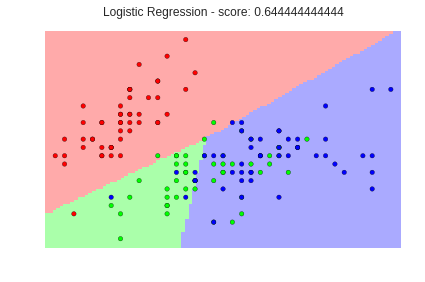

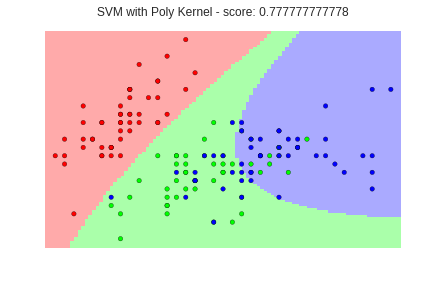

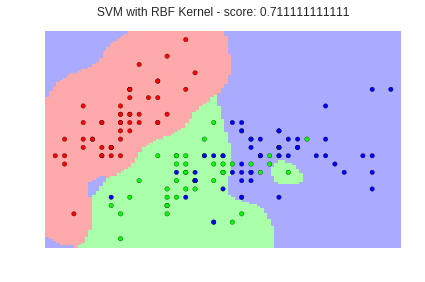

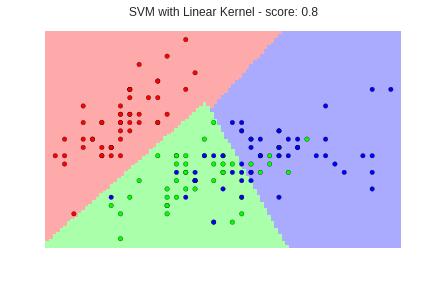

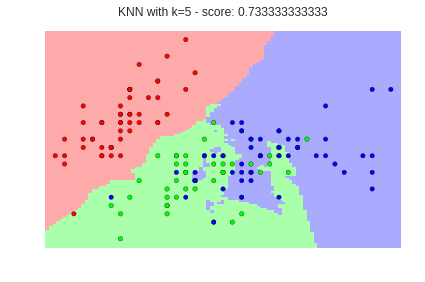

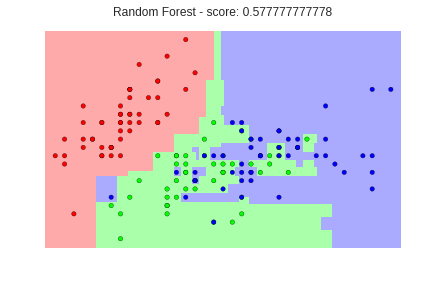

In [9]:
iris = datasets.load_iris()
compareWRTScore(iris.data[:,:2], iris.target)

### 2. Wine Classification

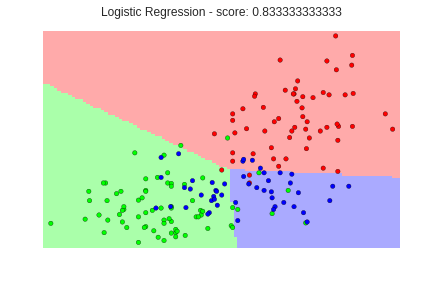

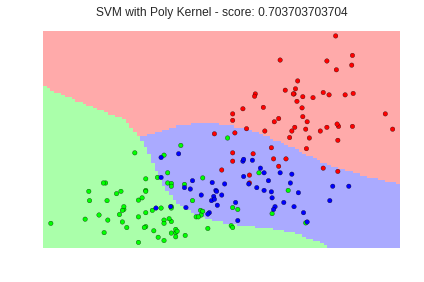

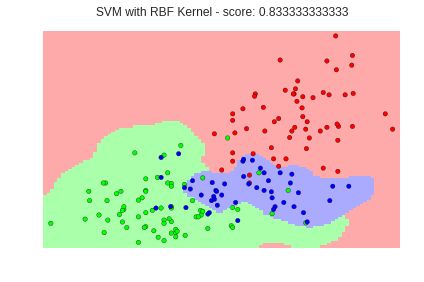

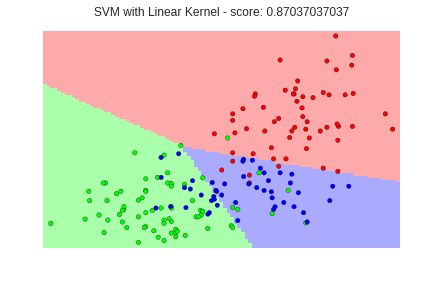

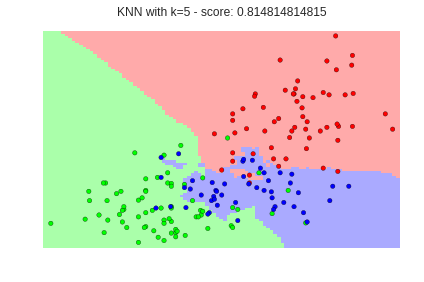

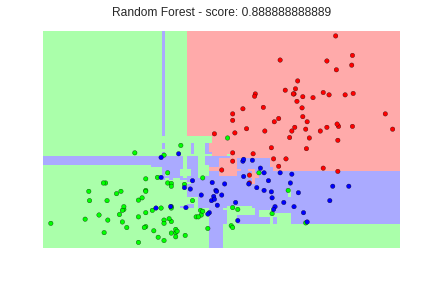

In [10]:
wine = pd.read_table("data/wine/wine.txt", sep='\s+')
attributes = ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

grape = wine.pop('region')
y = grape.values
wine.columns = attributes
X = wine[['Alcohol', 'Proline']].values
compareWRTScore(X, y)

### 3. Not-linearly separable data

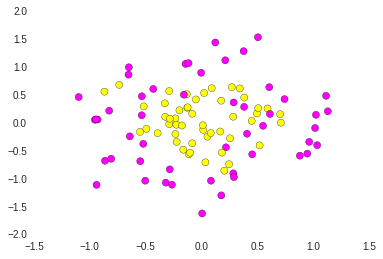

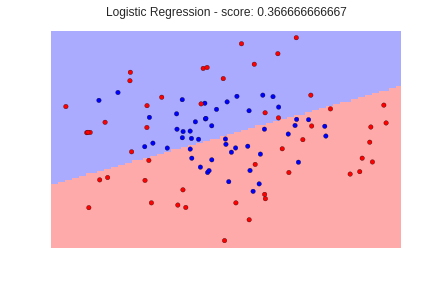

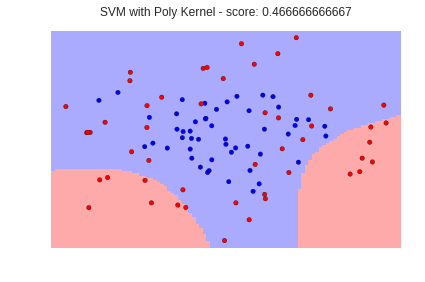

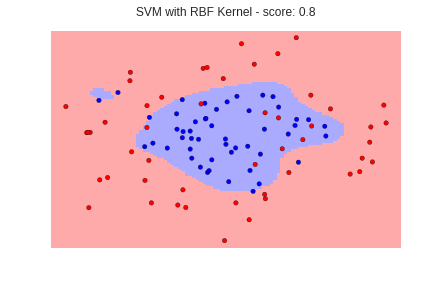

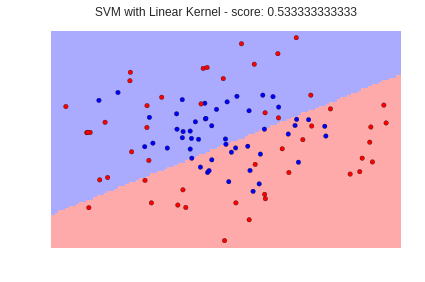

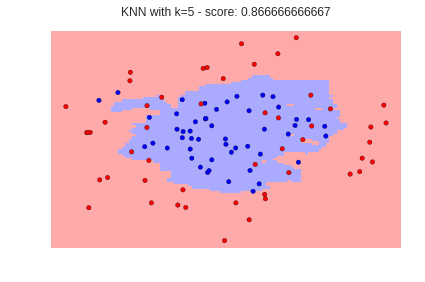

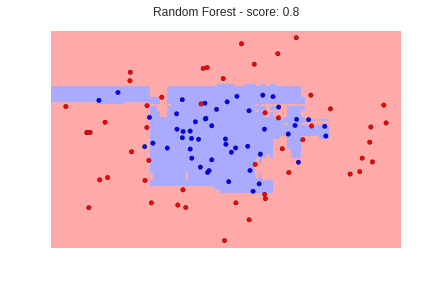

In [11]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.3, noise=.3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
compareWRTScore(X, y)

## Benchmark

In [12]:
results = compareWRTTime(X, y)

500 times training Logistic Regression with the data that has shape (70, 2) took 0.116724014282
15000 prediction with Logistic Regression took 0.513123035431

500 times training SVM with Poly Kernel with the data that has shape (70, 2) took 0.121850967407
15000 prediction with SVM with Poly Kernel took 0.686012983322

500 times training SVM with RBF Kernel with the data that has shape (70, 2) took 0.181604862213
15000 prediction with SVM with RBF Kernel took 0.704919099808

500 times training SVM with Linear Kernel with the data that has shape (70, 2) took 0.119120121002
15000 prediction with SVM with Linear Kernel took 0.68003487587

500 times training KNN with k=5 with the data that has shape (70, 2) took 0.0970478057861
15000 prediction with KNN with k=5 took 3.72002601624

500 times training Random Forest with the data that has shape (70, 2) took 6.46779680252
15000 prediction with Random Forest took 8.27655291557



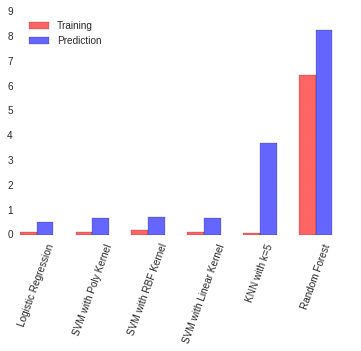

In [13]:
results = np.array(results)
index = np.arange(results.shape[0])

bar_width = 0.30
opacity = 0.6

rects1 = plt.bar(index, results[:, 1], bar_width, color="r", alpha=opacity)
rects2 = plt.bar(index + bar_width, results[:, 2], bar_width, color="b", alpha=opacity)
plt.legend((rects1[0], rects2[0]), ('Training', 'Prediction'), loc=2)
plt.xticks(index + bar_width, results[:,0], rotation=70)
plt.grid(True)

In [14]:
results[0, 1], results[0, 2]

('0.116724014282', '0.513123035431')

## 4. Case study: Predict survivors in Titanic data

In [15]:
df = pd.read_csv("data/tinanic/train.csv")
"""
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

"""
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.00,1,0,PC 17572,76.7292,D33,C
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.00,0,0,349912,7.7750,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.00,0,0,347071,7.7750,NaN,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.00,1,0,243847,27.0000,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## `Embarked` feature

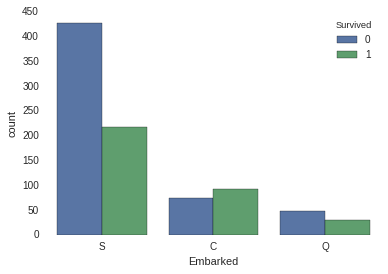

In [17]:
sns.countplot(data=df, hue="Survived", x="Embarked")

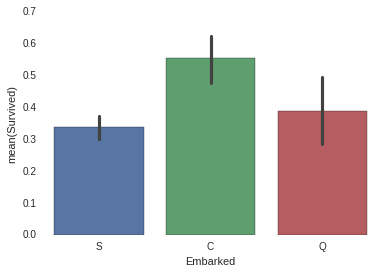

In [18]:
sns.barplot(data=df, x="Embarked", y="Survived")

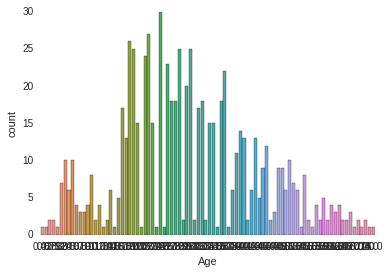

In [19]:
sns.countplot(data=df, x="Age")

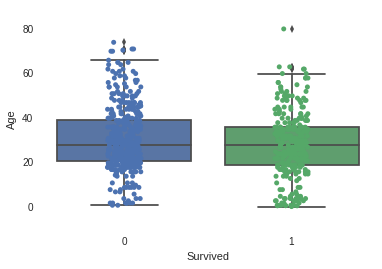

In [20]:
sns.boxplot(data=df, x="Survived", y="Age")
sns.stripplot(x="Survived", y="Age", data=df, jitter=True, edgecolor="gray")

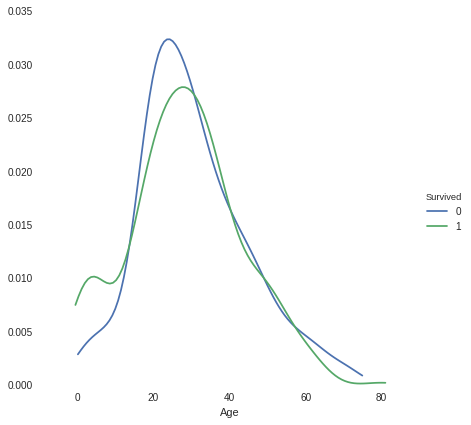

In [21]:
sns.FacetGrid(df, hue="Survived", size=6).map(sns.kdeplot, "Age").add_legend()

## `Sex` feature
First, let's have a look at which gender is dominant in the population by a countplot.

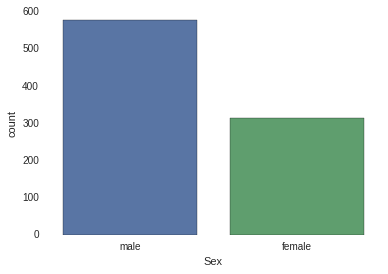

In [22]:
sns.countplot(data=df, x="Sex")

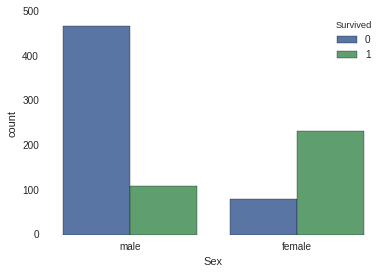

In [23]:
sns.countplot(data=df, hue="Survived", x="Sex")

According to **sex vs. survived** chart, most of men did not survived while the majority of women did. The following chart also supports this claim by showing us that 70% of women survived.

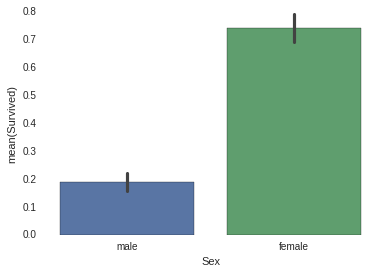

In [24]:
sns.barplot(data=df, x="Sex", y="Survived")

The inference is that this `sex` feature can be used in a classification task to determine whether a given person survived or not.

## Pclass feature
This stands for `Passenger Class`. There are three classes as 1 = 1st; 2 = 2nd; 3 = 3rd. We can make a guess saying most probably the first class passengers survived thanks to their nobility. This guess is based on the domain knowledge; in that time classes among the people is more obvious and severe than now. Let's have a look at the data to see the truth.

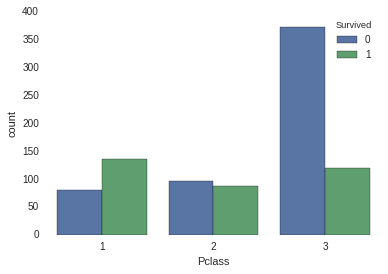

In [25]:
sns.countplot(data=df, hue="Survived", x="Pclass")

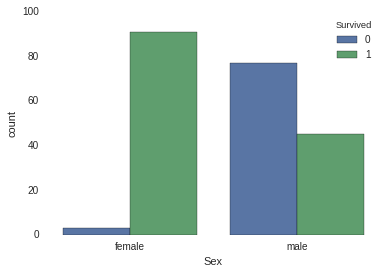

In [26]:
sns.countplot(data=df[df['Pclass'] == 1], hue="Survived", x="Sex")

The chart above corrects the guess: unfortunatelly, passenger class plays a crucial role.

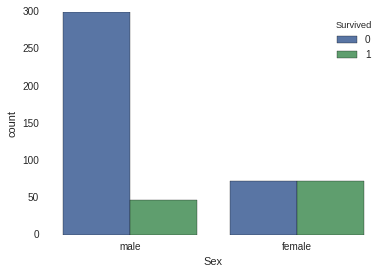

In [27]:
sns.countplot(data=df[df['Pclass'] == 3], hue="Survived", x="Sex")

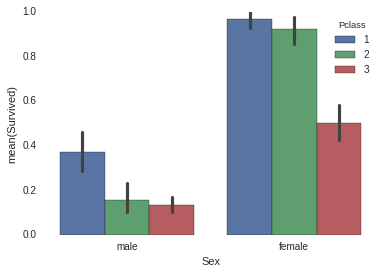

In [28]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

In [30]:
def titanicFit(df):

    X = df[["Sex", "Age", "Pclass", "Embarked"]]
    y = df["Survived"]

    X.Age.fillna(X.Age.mean(), inplace=True)

    X.Sex.replace(to_replace="male", value=1, inplace=True)
    X.Sex.replace(to_replace="female", value=0, inplace=True)

    X.Embarked.replace(to_replace="S", value=1, inplace=True)
    X.Embarked.replace(to_replace="C", value=2, inplace=True)
    X.Embarked.replace(to_replace="Q", value=3, inplace=True)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
            X, y, test_size=0.3, random_state=0)

    clf = svm.SVC(kernel="rbf")
    parameters = [
        {
            "kernel" :["linear"]
        }, {
            "kernel" :["rbf"], 
            "C":[1, 10, 100], 
            '"gamma":[0.001, 0.002, 0.01]}
        ]'

    clf = grid_search.GridSearchCV(
        svm.SVC(), param_grid=parameters, cv=5).fit(X, y)
    return clf
    #print clf.score(X_test, y_test)

clf = titanicFit(df[df.Embarked.isnull() == False])

In [36]:
clf.grid_scores_

[mean: 0.78628, std: 0.01847, params: {'kernel': 'linear'},
 mean: 0.63555, std: 0.01238, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001},
 mean: 0.63555, std: 0.00904, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.002},
 mean: 0.74691, std: 0.02952, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.01},
 mean: 0.78628, std: 0.02249, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001},
 mean: 0.79078, std: 0.02213, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.002},
 mean: 0.80427, std: 0.03027, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.01},
 mean: 0.79078, std: 0.02041, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.001},
 mean: 0.79415, std: 0.02246, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.002},
 mean: 0.80540, std: 0.01660, params: {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}]